In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

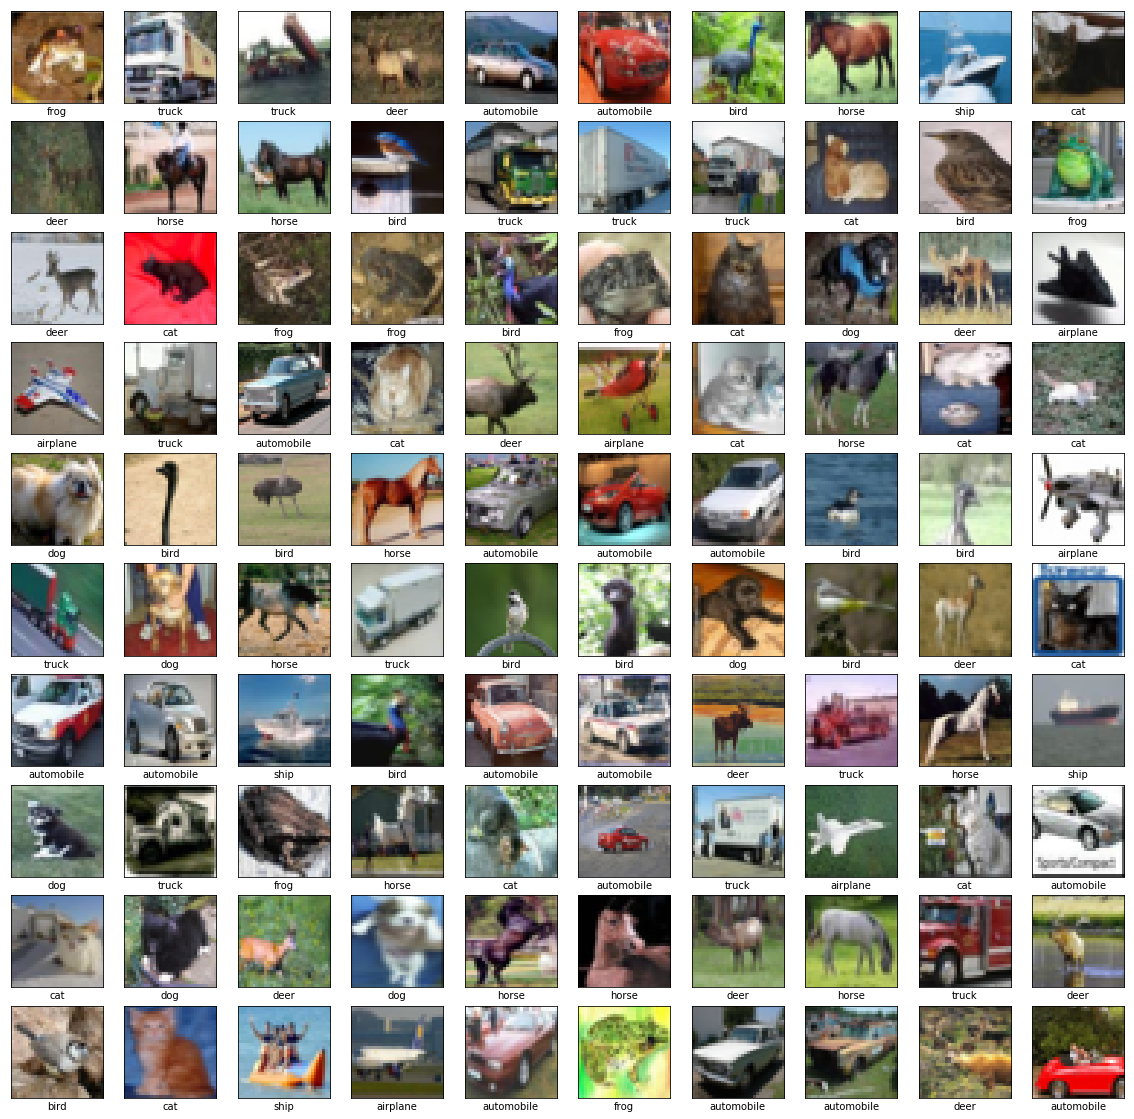

In [4]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(categories[train_labels[i][0]])
plt.show()

In [5]:
model = keras.Sequential([
    keras.Input(shape = (32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
    
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                73760     
____

In [6]:
#optimizer: Adam
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [7]:
train_images_norm = train_images.astype('float32')/255
test_images_norm = test_images.astype('float32')/255

In [8]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 28s 796us/sample - loss: 1.7070 - acc: 0.3655 - val_loss: 1.4907 - val_acc: 0.4674
Epoch 2/10
35000/35000 [==============================] - 27s 768us/sample - loss: 1.3644 - acc: 0.5096 - val_loss: 1.2781 - val_acc: 0.5401
Epoch 3/10
35000/35000 [==============================] - 27s 761us/sample - loss: 1.2271 - acc: 0.5602 - val_loss: 1.2039 - val_acc: 0.5737
Epoch 4/10
35000/35000 [==============================] - 27s 782us/sample - loss: 1.1294 - acc: 0.5971 - val_loss: 1.1114 - val_acc: 0.6105
Epoch 5/10
35000/35000 [==============================] - 27s 774us/sample - loss: 1.0449 - acc: 0.6300 - val_loss: 1.0991 - val_acc: 0.6127
Epoch 6/10
35000/35000 [==============================] - 27s 766us/sample - loss: 0.9794 - acc: 0.6570 - val_loss: 1.0477 - val_acc: 0.6376
Epoch 7/10
35000/35000 [==============================] - 27s 761us/sample - loss: 0.9232 - acc: 0.6773 

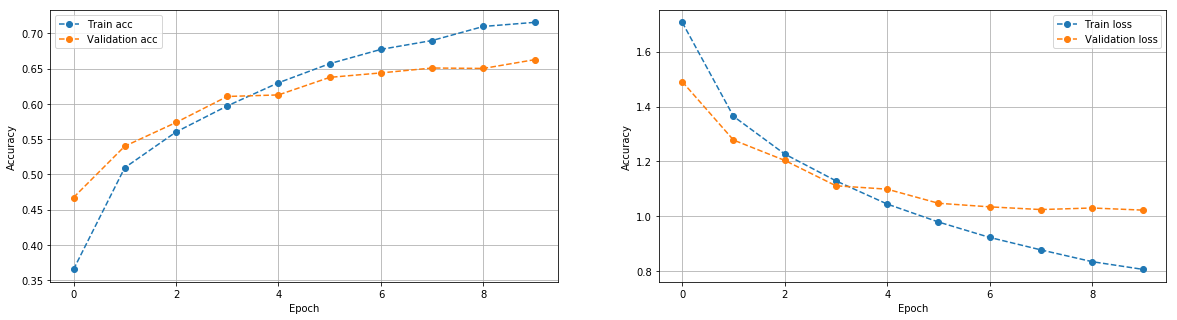

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [10]:
model = keras.Sequential([
    keras.Input(shape = (32,32,3)),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 128)       9728      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [11]:
#optimizer: Adam
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [12]:
train_images_norm = train_images.astype('float32')/255
test_images_norm = test_images.astype('float32')/255

In [13]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 90s 3ms/sample - loss: 1.8006 - acc: 0.3311 - val_loss: 1.5713 - val_acc: 0.4257
Epoch 2/10
35000/35000 [==============================] - 85s 2ms/sample - loss: 1.4311 - acc: 0.4757 - val_loss: 1.3873 - val_acc: 0.5047
Epoch 3/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 1.2938 - acc: 0.5322 - val_loss: 1.2979 - val_acc: 0.5285
Epoch 4/10
35000/35000 [==============================] - 85s 2ms/sample - loss: 1.2089 - acc: 0.5656 - val_loss: 1.1856 - val_acc: 0.5764
Epoch 5/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 1.1406 - acc: 0.5916 - val_loss: 1.1336 - val_acc: 0.5965
Epoch 6/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 1.0807 - acc: 0.6165 - val_loss: 1.1390 - val_acc: 0.5973
Epoch 7/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 1.0318 - acc: 0.6313 - val_loss: 1.

In [14]:
#epoch = 20

h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 93s 3ms/sample - loss: 0.8741 - acc: 0.6875 - val_loss: 1.0684 - val_acc: 0.6306
Epoch 2/20
35000/35000 [==============================] - 90s 3ms/sample - loss: 0.8430 - acc: 0.6991 - val_loss: 1.0063 - val_acc: 0.6538
Epoch 3/20
35000/35000 [==============================] - 90s 3ms/sample - loss: 0.8159 - acc: 0.7107 - val_loss: 1.0068 - val_acc: 0.6528
Epoch 4/20
35000/35000 [==============================] - 89s 3ms/sample - loss: 0.7921 - acc: 0.7205 - val_loss: 0.9954 - val_acc: 0.6587
Epoch 5/20
35000/35000 [==============================] - 88s 3ms/sample - loss: 0.7703 - acc: 0.7262 - val_loss: 1.0189 - val_acc: 0.6576
Epoch 6/20
35000/35000 [==============================] - 96s 3ms/sample - loss: 0.7479 - acc: 0.7343 - val_loss: 1.0120 - val_acc: 0.6589
Epoch 7/20
35000/35000 [==============================] - 91s 3ms/sample - loss: 0.7346 - acc: 0.7393 - val_loss: 0.

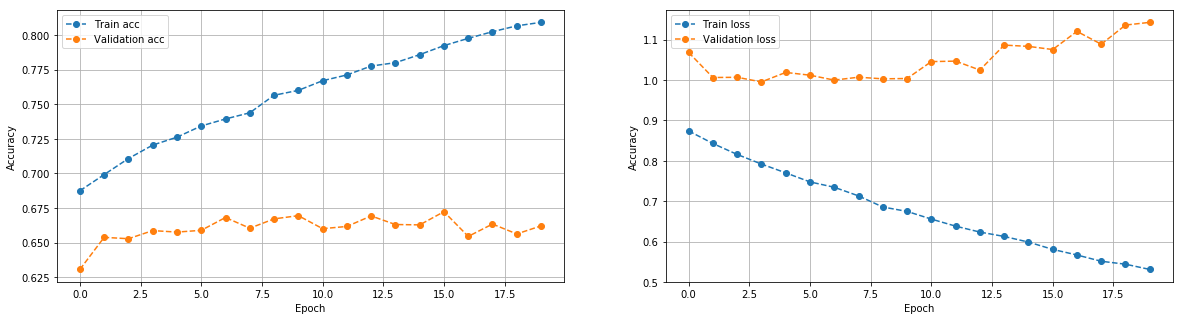

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [16]:
#optimizer: Adam
#Loss function: kullback_leibler_divergence

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 0.001),
    loss = keras.losses.kullback_leibler_divergence,
    metrics = ['accuracy']
)

In [17]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 21.2494 - acc: 0.0837 - val_loss: 20.6741 - val_acc: 0.1103
Epoch 2/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7522 - acc: 0.1024 - val_loss: 20.6667 - val_acc: 0.0856
Epoch 3/10
35000/35000 [==============================] - 88s 3ms/sample - loss: 20.7493 - acc: 0.0745 - val_loss: 20.6657 - val_acc: 0.0321
Epoch 4/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 20.7487 - acc: 0.0459 - val_loss: 20.6653 - val_acc: 0.0332
Epoch 5/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 20.7485 - acc: 0.0426 - val_loss: 20.6651 - val_acc: 0.0337
Epoch 6/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 20.7484 - acc: 0.0464 - val_loss: 20.6650 - val_acc: 0.0379
Epoch 7/10

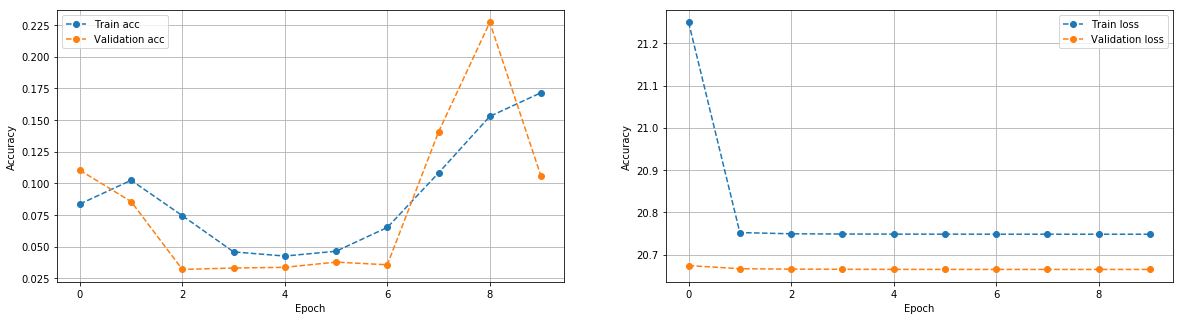

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [19]:
#optimizer: SGD
#Loss function: kullback_leibler_divergence

model.compile(
    optimizer= keras.optimizers.SGD(learning_rate = 0.001),
    loss = keras.losses.kullback_leibler_divergence,
    metrics = ['accuracy']
)

In [20]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.1680 - val_loss: 20.6649 - val_acc: 0.1724
Epoch 2/10
35000/35000 [==============================] - 85s 2ms/sample - loss: 20.7483 - acc: 0.1745 - val_loss: 20.6649 - val_acc: 0.1745
Epoch 3/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.1754 - val_loss: 20.6649 - val_acc: 0.1722
Epoch 4/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.1755 - val_loss: 20.6649 - val_acc: 0.1707
Epoch 5/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 20.7483 - acc: 0.1747 - val_loss: 20.6649 - val_acc: 0.1747
Epoch 6/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.1760 - val_loss: 20.6649 - val_acc: 0.1718
Epoch 7/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.1759 -

In [21]:
#optimizer: SGD
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.SGD(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [22]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.3026 - acc: 0.0961 - val_loss: 2.3024 - val_acc: 0.0858
Epoch 2/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.3020 - acc: 0.1032 - val_loss: 2.3015 - val_acc: 0.1003
Epoch 3/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 2.3012 - acc: 0.0992 - val_loss: 2.3008 - val_acc: 0.1001
Epoch 4/10
35000/35000 [==============================] - 85s 2ms/sample - loss: 2.3004 - acc: 0.0997 - val_loss: 2.2999 - val_acc: 0.0989
Epoch 5/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.2995 - acc: 0.0989 - val_loss: 2.2989 - val_acc: 0.0985
Epoch 6/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.2979 - acc: 0.0944 - val_loss: 2.2966 - val_acc: 0.0943
Epoch 7/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 2.2940 - acc: 0.1096 - val_loss: 2.

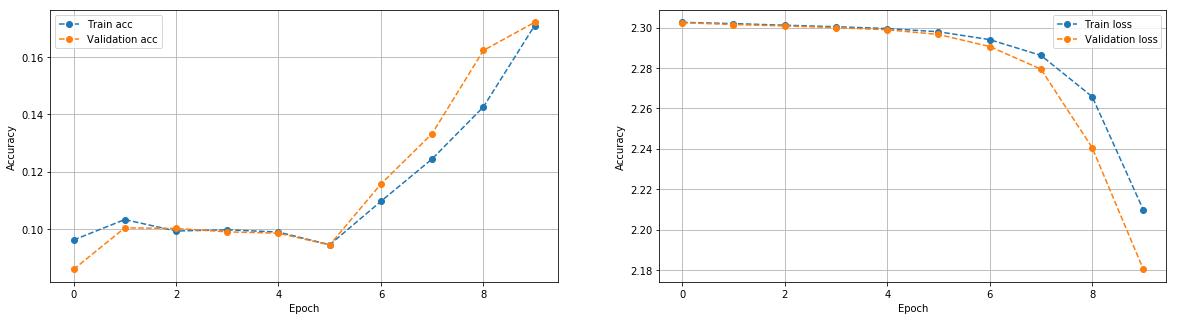

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [24]:
#epoch = 20

h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.1575 - acc: 0.1861 - val_loss: 2.1393 - val_acc: 0.1855
Epoch 2/20
35000/35000 [==============================] - 88s 3ms/sample - loss: 2.1143 - acc: 0.1984 - val_loss: 2.0924 - val_acc: 0.2019
Epoch 3/20
35000/35000 [==============================] - 87s 2ms/sample - loss: 2.0763 - acc: 0.2033 - val_loss: 2.0634 - val_acc: 0.2018
Epoch 4/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.0456 - acc: 0.2066 - val_loss: 2.0370 - val_acc: 0.2108
Epoch 5/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 2.0171 - acc: 0.2113 - val_loss: 1.9965 - val_acc: 0.2149
Epoch 6/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 1.9873 - acc: 0.2116 - val_loss: 1.9747 - val_acc: 0.2197
Epoch 7/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 1.9617 - acc: 0.2168 - val_loss: 1.

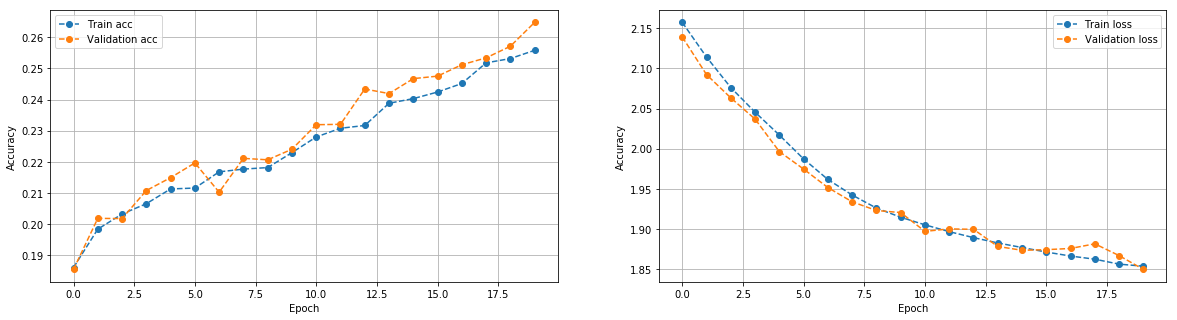

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [26]:
#optimizer: RMSprop
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [27]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 88s 3ms/sample - loss: 1.8187 - acc: 0.3021 - val_loss: 1.7349 - val_acc: 0.3561
Epoch 2/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 1.3640 - acc: 0.4985 - val_loss: 1.1380 - val_acc: 0.6415
Epoch 3/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 0.6496 - acc: 0.7693 - val_loss: 1.1267 - val_acc: 0.6606
Epoch 4/10
35000/35000 [==============================] - 86s 2ms/sample - loss: 0.5651 - acc: 0.7975 - val_loss: 1.1537 - val_acc: 0.6618
Epoch 5/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 0.5427 - acc: 0.8069 - val_loss: 1.1348 - val_acc: 0.6663
Epoch 6/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 0.5275 - acc: 0.8127 - val_loss: 1.2725 - val_acc: 0.6562
Epoch 7/10
35000/35000 [==============================] - 87s 2ms/sample - loss: 0.5130 - acc: 0.8165 - val_loss: 1.

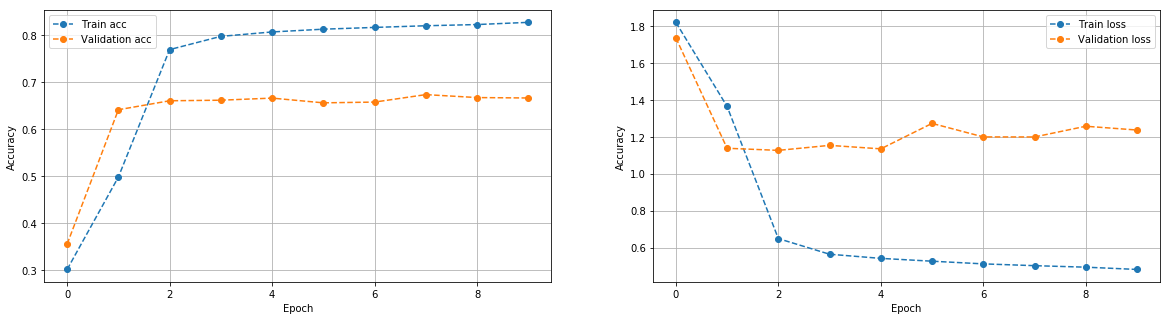

In [28]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [31]:
#epoch = 20

h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 88s 3ms/sample - loss: 20.7483 - acc: 0.1103 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 2/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.0689 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 3/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.0631 - val_loss: 20.6650 - val_acc: 0.0000e+00
Epoch 4/20
35000/35000 [==============================] - 86s 2ms/sample - loss: 20.7483 - acc: 0.1015 - val_loss: 20.6650 - val_acc: 0.0000e+00
Epoch 5/20
35000/35000 [==============================] - 88s 3ms/sample - loss: 20.7483 - acc: 0.0850 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 6/20
35000/35000 [==============================] - 87s 2ms/sample - loss: 20.7483 - acc: 0.0887 - val_loss: 20.6650 - val_acc: 0.0000e+00
Epoch 7/20
35000/35000 [==============================] - 88s 3ms/sample - loss:

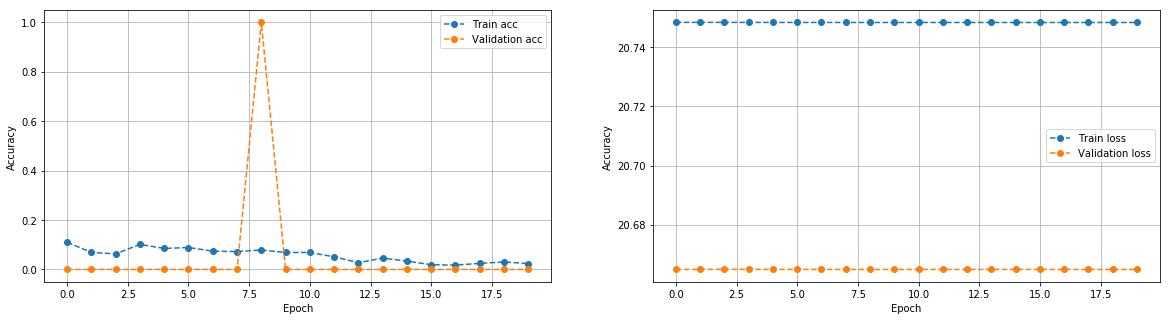

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [33]:
#optimizer: RMSprop
#Loss function: kullback_leibler_divergence

model.compile(
    optimizer= keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = keras.losses.kullback_leibler_divergence,
    metrics = ['accuracy']
)

In [34]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 89s 3ms/sample - loss: 20.7483 - acc: 0.0357 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 2/10
35000/35000 [==============================] - 89s 3ms/sample - loss: 20.7483 - acc: 0.0229 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 3/10
35000/35000 [==============================] - 88s 3ms/sample - loss: 20.7483 - acc: 0.0247 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 4/10
35000/35000 [==============================] - 89s 3ms/sample - loss: 20.7483 - acc: 0.0329 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 5/10
35000/35000 [==============================] - 88s 3ms/sample - loss: 20.7483 - acc: 0.0293 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 6/10
35000/35000 [==============================] - 88s 3ms/sample - loss: 20.7483 - acc: 0.0384 - val_loss: 20.6649 - val_acc: 0.0000e+00
Epoch 7/10
35000/35000 [==============================] - 88s 3ms/sample - loss:

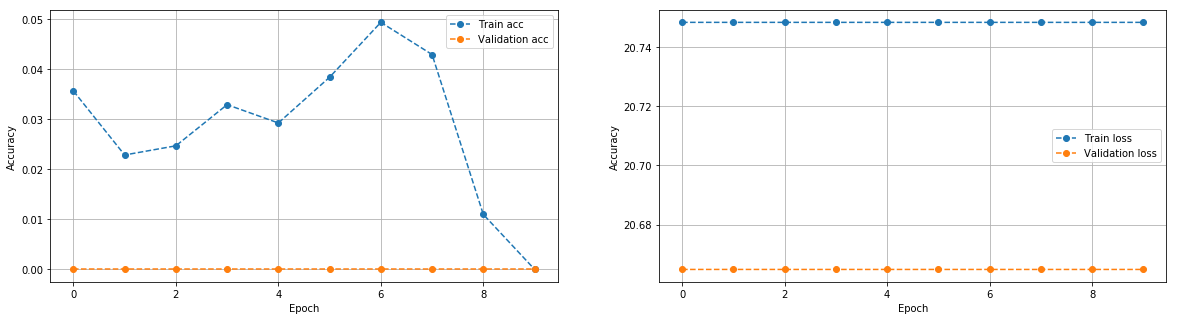

In [35]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [41]:
#new model

model = keras.Sequential([
    keras.Input(shape = (32,32,3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
    
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [42]:
#optimizer: Adam
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [43]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 51s 1ms/sample - loss: 1.7008 - acc: 0.3691 - val_loss: 1.4710 - val_acc: 0.4770
Epoch 2/10
35000/35000 [==============================] - 51s 1ms/sample - loss: 1.3000 - acc: 0.5301 - val_loss: 1.2531 - val_acc: 0.5575
Epoch 3/10
35000/35000 [==============================] - 50s 1ms/sample - loss: 1.1446 - acc: 0.5896 - val_loss: 1.1647 - val_acc: 0.5933
Epoch 4/10
35000/35000 [==============================] - 51s 1ms/sample - loss: 1.0209 - acc: 0.6355 - val_loss: 1.0246 - val_acc: 0.6439
Epoch 5/10
35000/35000 [==============================] - 52s 1ms/sample - loss: 0.9233 - acc: 0.6735 - val_loss: 1.0307 - val_acc: 0.6413
Epoch 6/10
35000/35000 [==============================] - 51s 1ms/sample - loss: 0.8448 - acc: 0.7014 - val_loss: 0.9757 - val_acc: 0.6650
Epoch 7/10
35000/35000 [==============================] - 51s 1ms/sample - loss: 0.7830 - acc: 0.7241 - val_loss: 0.

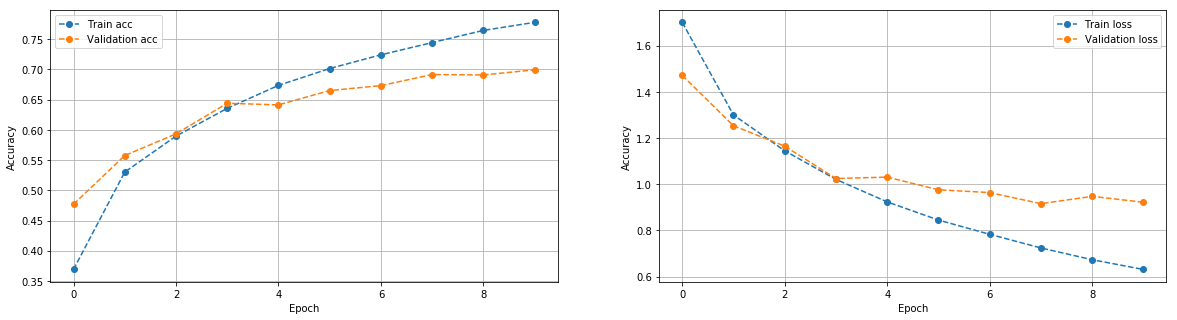

In [44]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [46]:
#epoch = 20
#validation split = 0.2

h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.3259 - acc: 0.8850 - val_loss: 1.2160 - val_acc: 0.6995
Epoch 2/20
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.3083 - acc: 0.8906 - val_loss: 1.2661 - val_acc: 0.6973
Epoch 3/20
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.2999 - acc: 0.8931 - val_loss: 1.2459 - val_acc: 0.6963
Epoch 4/20
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.2664 - acc: 0.9054 - val_loss: 1.3529 - val_acc: 0.6967
Epoch 5/20
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.2535 - acc: 0.9092 - val_loss: 1.3683 - val_acc: 0.6924
Epoch 6/20
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.2441 - acc: 0.9133 - val_loss: 1.4290 - val_acc: 0.6998
Epoch 7/20
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.2333 - acc: 0.9154 - val_loss: 1.

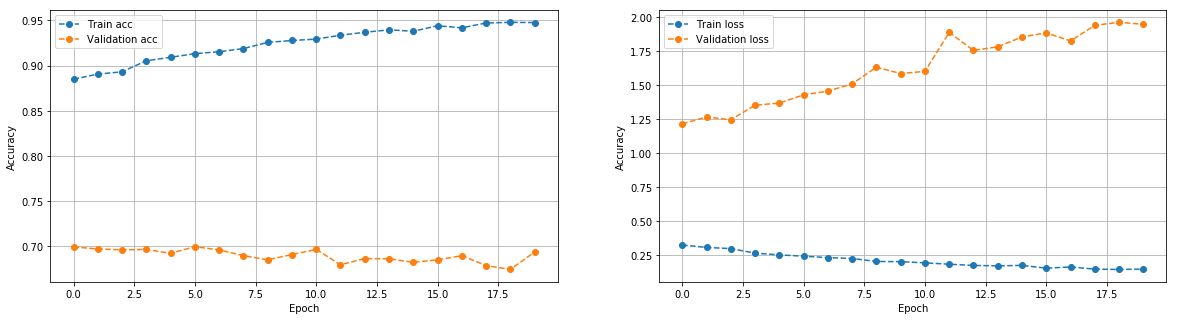

In [47]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [48]:
#optimizer: RMSprop
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [49]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1341 - acc: 0.9516 - val_loss: 2.1697 - val_acc: 0.6905
Epoch 2/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1244 - acc: 0.9578 - val_loss: 2.2939 - val_acc: 0.6887
Epoch 3/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1194 - acc: 0.9582 - val_loss: 2.3605 - val_acc: 0.6885
Epoch 4/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1217 - acc: 0.9587 - val_loss: 2.4338 - val_acc: 0.6895
Epoch 5/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1208 - acc: 0.9600 - val_loss: 2.5864 - val_acc: 0.6907
Epoch 6/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1187 - acc: 0.9602 - val_loss: 2.6286 - val_acc: 0.6900
Epoch 7/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.1165 - acc: 0.9611 - val_loss: 2.

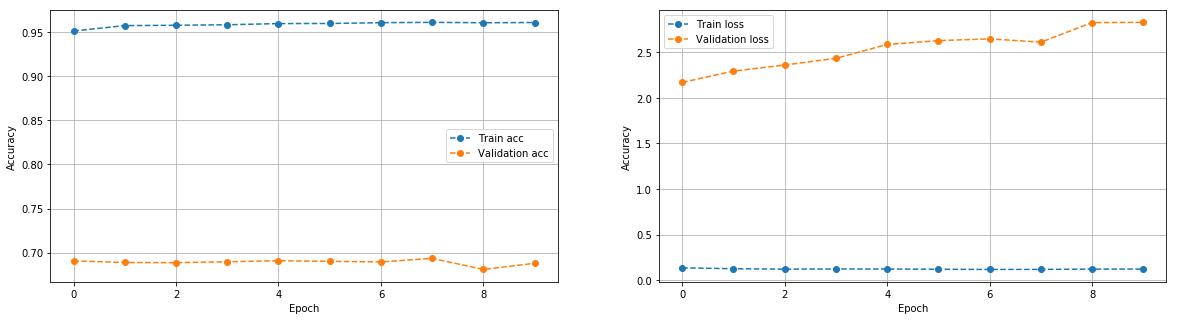

In [50]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [51]:
#optimizer: SGD
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.SGD(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [52]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 56s 1ms/sample - loss: 0.0288 - acc: 0.9907 - val_loss: 2.6732 - val_acc: 0.6950
Epoch 2/10
40000/40000 [==============================] - 54s 1ms/sample - loss: 0.0188 - acc: 0.9944 - val_loss: 2.6865 - val_acc: 0.6972
Epoch 3/10
40000/40000 [==============================] - 54s 1ms/sample - loss: 0.0156 - acc: 0.9962 - val_loss: 2.7053 - val_acc: 0.6985
Epoch 4/10
40000/40000 [==============================] - 54s 1ms/sample - loss: 0.0132 - acc: 0.9969 - val_loss: 2.7271 - val_acc: 0.6988
Epoch 5/10
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.0118 - acc: 0.9974 - val_loss: 2.7420 - val_acc: 0.6996
Epoch 6/10
40000/40000 [==============================] - 54s 1ms/sample - loss: 0.0107 - acc: 0.9980 - val_loss: 2.7557 - val_acc: 0.6990
Epoch 7/10
40000/40000 [==============================] - 55s 1ms/sample - loss: 0.0098 - acc: 0.9985 - val_loss: 2.

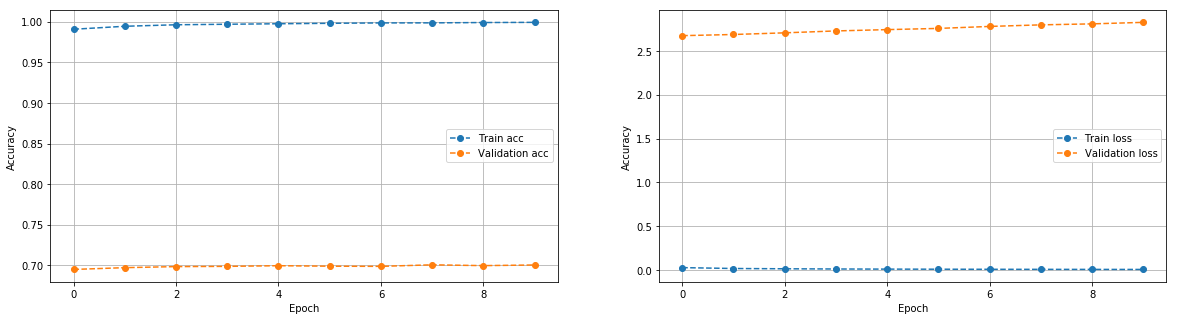

In [53]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [55]:
#new model

model = keras.Sequential([
    keras.Input(shape = (32,32,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
    
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)              

In [56]:
#optimizer: Adam
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 0.0001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [57]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 17s 491us/sample - loss: 2.1909 - acc: 0.1889 - val_loss: 2.0246 - val_acc: 0.2673
Epoch 2/10
35000/35000 [==============================] - 16s 464us/sample - loss: 1.8685 - acc: 0.3273 - val_loss: 1.7581 - val_acc: 0.3616
Epoch 3/10
35000/35000 [==============================] - 16s 465us/sample - loss: 1.6885 - acc: 0.3865 - val_loss: 1.6317 - val_acc: 0.4067
Epoch 4/10
35000/35000 [==============================] - 16s 469us/sample - loss: 1.6003 - acc: 0.4164 - val_loss: 1.5715 - val_acc: 0.4303
Epoch 5/10
35000/35000 [==============================] - 17s 477us/sample - loss: 1.5407 - acc: 0.4392 - val_loss: 1.5331 - val_acc: 0.4515
Epoch 6/10
35000/35000 [==============================] - 16s 470us/sample - loss: 1.5008 - acc: 0.4546 - val_loss: 1.5053 - val_acc: 0.4517
Epoch 7/10
35000/35000 [==============================] - 16s 455us/sample - loss: 1.4709 - acc: 0.4680 

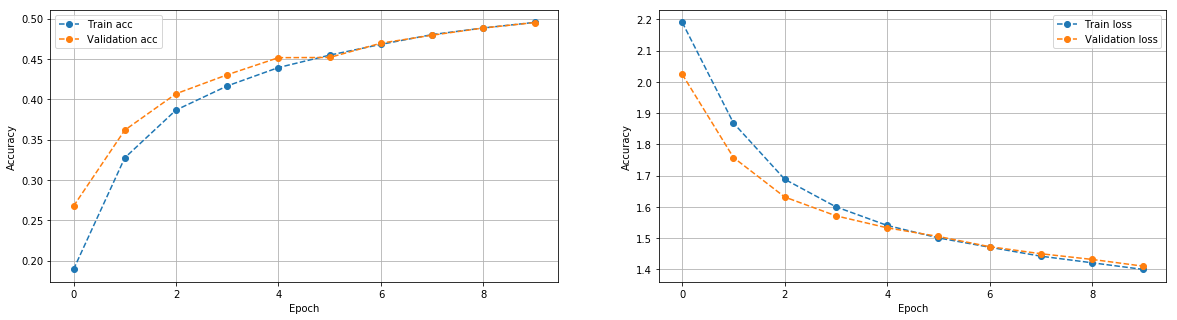

In [58]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [59]:
#optimizer: Adam
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate = 0.01),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [60]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 17s 493us/sample - loss: 2.0107 - acc: 0.2686 - val_loss: 1.7807 - val_acc: 0.3429
Epoch 2/10
35000/35000 [==============================] - 16s 471us/sample - loss: 1.7508 - acc: 0.3641 - val_loss: 1.7683 - val_acc: 0.3509
Epoch 3/10
35000/35000 [==============================] - 16s 469us/sample - loss: 1.6957 - acc: 0.3845 - val_loss: 1.7915 - val_acc: 0.3625
Epoch 4/10
35000/35000 [==============================] - 17s 474us/sample - loss: 1.6728 - acc: 0.3935 - val_loss: 1.7750 - val_acc: 0.3525
Epoch 5/10
35000/35000 [==============================] - 16s 467us/sample - loss: 1.6630 - acc: 0.3979 - val_loss: 1.6684 - val_acc: 0.4011
Epoch 6/10
35000/35000 [==============================] - 16s 470us/sample - loss: 1.6496 - acc: 0.4007 - val_loss: 1.6874 - val_acc: 0.3769
Epoch 7/10
35000/35000 [==============================] - 17s 479us/sample - loss: 1.6447 - acc: 0.4038 

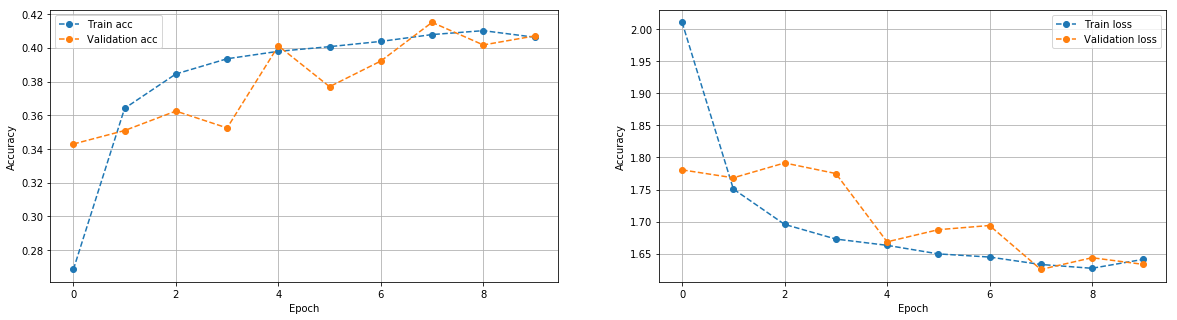

In [61]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [62]:
#optimizer: RMSprop
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [63]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 15s 439us/sample - loss: 1.5166 - acc: 0.4466 - val_loss: 1.5596 - val_acc: 0.4354
Epoch 2/10
35000/35000 [==============================] - 14s 392us/sample - loss: 1.4970 - acc: 0.4540 - val_loss: 1.5643 - val_acc: 0.4372
Epoch 3/10
35000/35000 [==============================] - 13s 377us/sample - loss: 1.4883 - acc: 0.4586 - val_loss: 1.5608 - val_acc: 0.4369
Epoch 4/10
35000/35000 [==============================] - 13s 383us/sample - loss: 1.4817 - acc: 0.4600 - val_loss: 1.5507 - val_acc: 0.4422
Epoch 5/10
35000/35000 [==============================] - 13s 377us/sample - loss: 1.4786 - acc: 0.4619 - val_loss: 1.5676 - val_acc: 0.4339
Epoch 6/10
35000/35000 [==============================] - 13s 385us/sample - loss: 1.4732 - acc: 0.4635 - val_loss: 1.5525 - val_acc: 0.4458
Epoch 7/10
35000/35000 [==============================] - 13s 377us/sample - loss: 1.4706 - acc: 0.4646 

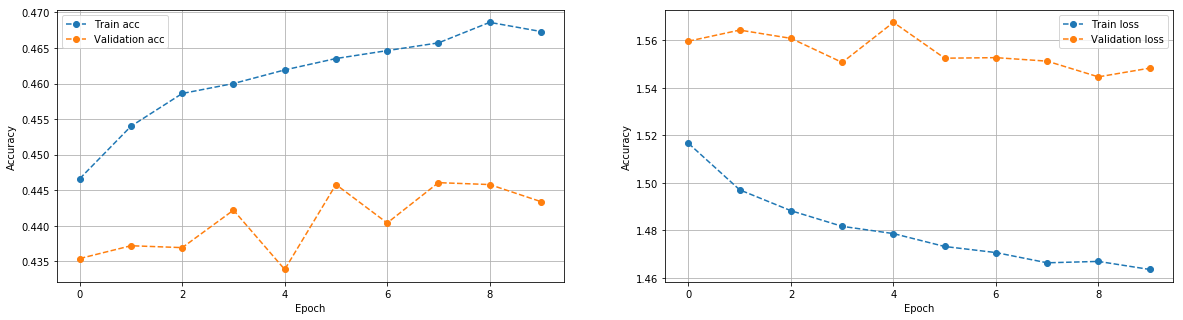

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['acc'], '--o')
plt.plot(h.history['val_acc'], '--o')
plt.legend(['Train acc', 'Validation acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train loss', 'Validation loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [65]:
#optimizer: SGD
#Loss function: sparse_categorical_crossentropy

model.compile(
    optimizer= keras.optimizers.SGD(learning_rate = 0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [66]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=32, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 14s 395us/sample - loss: 1.4471 - acc: 0.4740 - val_loss: 1.5415 - val_acc: 0.4451
Epoch 2/10
35000/35000 [==============================] - 13s 376us/sample - loss: 1.4449 - acc: 0.4744 - val_loss: 1.5384 - val_acc: 0.4467
Epoch 3/10
35000/35000 [==============================] - 13s 377us/sample - loss: 1.4441 - acc: 0.4754 - val_loss: 1.5402 - val_acc: 0.4470
Epoch 4/10
35000/35000 [==============================] - 13s 375us/sample - loss: 1.4434 - acc: 0.4753 - val_loss: 1.5412 - val_acc: 0.4489
Epoch 5/10
35000/35000 [==============================] - 13s 376us/sample - loss: 1.4432 - acc: 0.4751 - val_loss: 1.5363 - val_acc: 0.4473
Epoch 6/10
35000/35000 [==============================] - 13s 378us/sample - loss: 1.4426 - acc: 0.4759 - val_loss: 1.5365 - val_acc: 0.4467
Epoch 7/10
35000/35000 [==============================] - 14s 386us/sample - loss: 1.4423 - acc: 0.4757 